# Datos

In [1]:
#paquetes locales diseñados para nuestro caso de estudio
from localpacks.data import get_data 

#utilidades para los mapas
import os
import folium
import contextily as ctx #la usamos para agregar un mapa de fondo

#graicos
import matplotlib.pyplot as plt

### Inspeccionamos nuestros datos

In [2]:
cordoba_sf = get_data()

In [3]:
cordoba_sf.head(3)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,"POLYGON ((3686668.391348725 6672098.301358264,..."
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,"POLYGON ((3651995.370083685 6492136.442240674,..."
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,"POLYGON ((3646477.920536898 6501399.587313074,..."


Podemos observar que los datos corresponden a los de la descripción del **README.md**

## Alternativa para visualizar los datos

Algunas de los radios censales, que representan zonas de alta densidad de población en areás colindantes, se solapan por lo que una opción es representar cada área por su centroide.

In [16]:
cordoba_sf_centroid = cordoba_sf.copy()

In [17]:
cordoba_sf_centroid['geometry'] = cordoba_sf_centroid.centroid

In [18]:
cordoba_sf_centroid.head()

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,POINT (3697241.763885154 6662169.957066355)
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,POINT (3655866.806322498 6489631.934621866)
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,POINT (3643878.53016293 6499528.634456442)
3,336419,140700210,119.0,124.0,243.0,88.0,139.0,86.0,POINT (3586756.529598954 6544557.268892568)
4,336418,140280706,142.0,108.0,250.0,79.0,146.0,77.0,POINT (3601623.298581214 6553883.718494492)


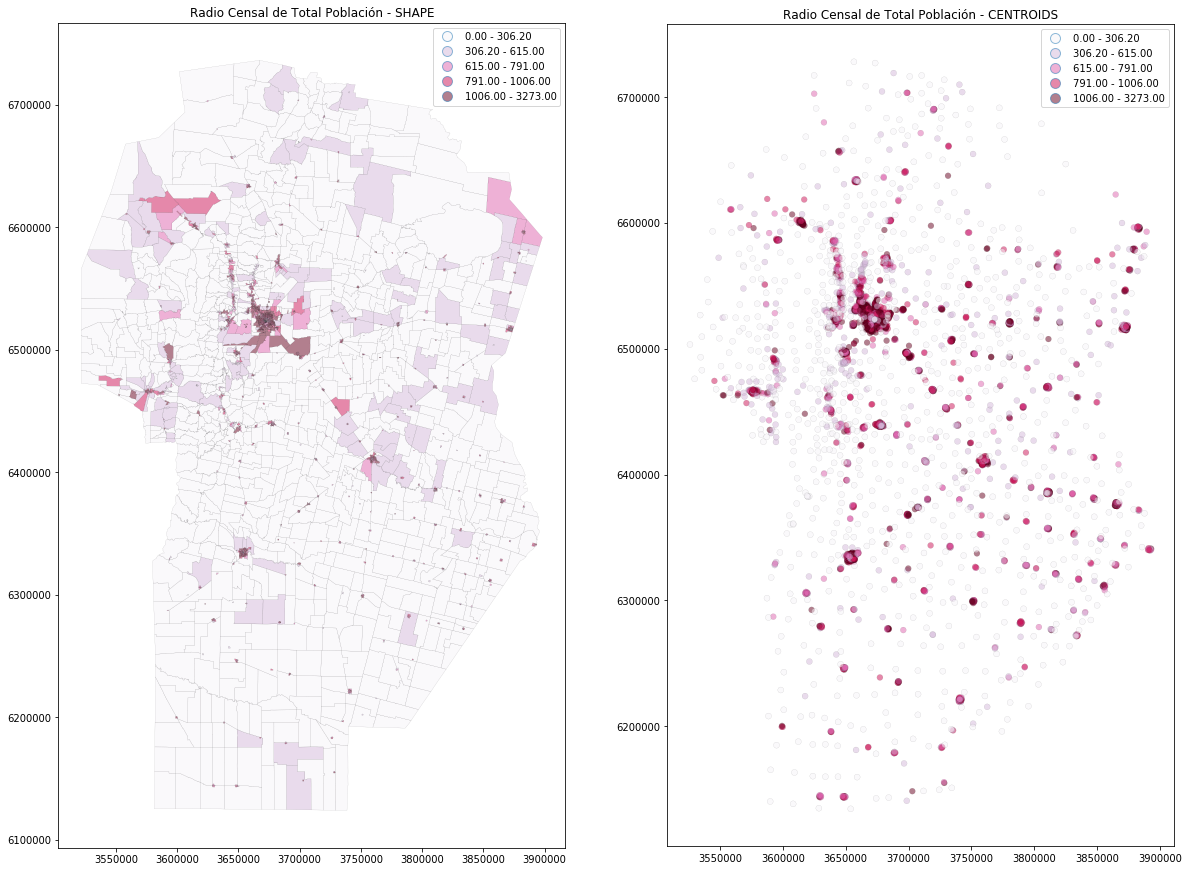

In [19]:
f,ax = plt.subplots(1,2,figsize=(20,20))

#Datos a plotear
cordoba_sf.plot(column='totalpobl', edgecolor='k', ax=ax[0], alpha=.5, cmap='PuRd', scheme='quantiles', legend=True, linewidth=.1,)
cordoba_sf_centroid.plot(column='totalpobl', edgecolor='k', ax=ax[1], alpha=.5, cmap='PuRd', scheme='quantiles', legend=True, linewidth=.1,)

#Datos de los plotters
ax[0].set_title('Radio Censal de Total Población - SHAPE')
ax[1].set_title('Radio Censal de Total Población - CENTROIDS')

plt.show();